# Assignment 4B: Vanilla Network
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### In this Assignment we are going to run a CNN model on top of MNIST data by using only 3 × 3 conv, 1 × 1 conv and maxpooling as this is going to be our first vanilla network, on top of which we will make some change to improve it. 
### So to achieve the goal lets fist install keras library with which we are going to build the model and  import all pakages from keras with which we are going to build the CNN model

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Now we are going to load the pre-shuffled MNIST data. Out of total 70k data we have 60k hand written image as train data and 10k hand written image as test data which is autometically predefined in mnist dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


### Let's see how our MNIST data looks like in below. Here we can see the 5th hand written digit in X_train as 2 in the displayed image.

(60000, 28, 28)


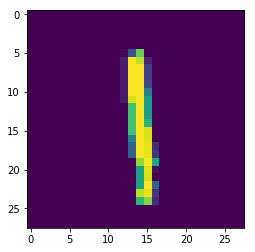

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[8])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values to 0-1 as grey scale pixel lies between 0-255. So to train a robust we must scale the pixcel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our CNN model which we are going to apply on our train data for training the model later. Here we are using 2-D convolution, maxpooling and softmax activation function to get output.

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#26

model.add(Convolution2D(64, 3, 3, activation='relu'))#24

model.add(Convolution2D(64, 3, 3, activation='relu'))#22

model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(32, 3, 3, activation='relu'))#9

model.add(Convolution2D(64, 3, 3, activation='relu'))#7

model.add(Convolution2D(64, 3, 3, activation='relu'))#5

model.add(Convolution2D(10, 1, 1, activation='relu'))#5
model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykerne

### Here in the model summary we can see that out total no of model parameter is 125k.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 22, 22, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 64)          18496     
__________

### Lets's compile the model with adam optimizer ,loss as cross entropy and validation matrix as accuracy. After compiling the model we are going to train it with training data and let's see how much training accuracy we get after training completion. Here we have used batch size as 32 and total no of epoch 20 to train the model.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0385 - val_acc: 0.9872
Epoch 2/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0332 - val_acc: 0.9884
Epoch 3/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0301 - acc: 0.9912 - val_loss: 0.0274 - val_acc: 0.9914
Epoch 4/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.0412 - val_acc: 0.9884
Epoch 5/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.0232 - acc: 0.9921 - val_loss: 0.0325 - val_acc: 0.9904
Epoch 6/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0337 - val_acc: 0.9914
Epoch 7/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.048743565161659896, 0.9904]


#### In this first we can see we have achieved maximum of 99.24% validation accuracy in 19th epoch out of 20. Here we have only used 3 × 3 conv, 1 × 1 conv and maxpooling layer. Total global receptive field for this network is 25. Here we have used atleast 3 layers of convolution before using maxpooling as MNIST is a very small dataset and there is not much texture and gradient to learn from this data.. So, 3 layers of conv layers are enough. Aslo, for the same reason we have only used 32 filters in the first layers. 
#### As we have achieved this result in this network, in next few network we will try to reduce parameters and achieve more accuracy.